# **Regressão Linear Simples**

## 🍨 Prevendo vendas de sorvetes com base na temperatura

Você vai aplicou regressão linear na prática? Nesta aula eu vou te apresentar de forma bem simples como se aplica a regressão linear utilizando python. Para nosso defafio do vídeo de hoje, vamos utilizar uma base de dados que contém dados sobre a temperatura do clima e as vendas de sorvete. Será tem alguma relação entre essas features?

In [ ]:
%pip install pandas matplotlib scikit-learn openpyxl 

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl



#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Importando a base de dados
dados = pd.read_excel("Sorvete.xlsx")
dados.head()

Que tal um gráfico para visualizar melhor esses dados de vendas em relação à temperatura? Vamos plotar um gráfico de scatter.

In [ ]:
# Visualizando os dados
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Relação entre Temperatura e Vendas de Sorvetes')
plt.show()


Observe aqui que a relação entre as duas variáveis é linear! Como será que é a correlação entre as duas variáveis? Eu imagino que seja uma alta correlação pois a direção de crescimento entre ambas é linear.Vamos analisar!

**O que o gráfico sugere?**

Os pontos seguem uma tendência positiva: quanto maior a temperatura, maior a venda de sorvete

Essa tendência parece razoavelmente linear, ou seja, pode ser aproximada por uma reta

Mesmo com alguma variação natural nos dados (alguns dias vendem mais ou menos que a média para aquela temperatura), o padrão geral sugere linearidade

In [ ]:
print(dados.corr())


> O código dados.corr() é utilizado para calcular a matriz de correlação entre as colunas do DataFrame chamado dados, geralmente criado com a biblioteca pandas no Python. A matriz de correlação mostra o grau de relação linear entre cada par de variáveis numéricas do seu conjunto de dados, com valores variando de -1 (correlação negativa perfeita) até 1 (correlação positiva perfeita), sendo 0 a ausência de correlação linear.
Esse método é muito útil em projetos de análise de dados e machine learning, pois permite identificar quais variáveis estão mais relacionadas entre si. Por exemplo, ao analisar a matriz resultante, você pode descobrir se existe uma forte relação entre a variável independente e a variável alvo, o que pode indicar que a variável é relevante para um modelo de regressão linear.
Vale lembrar que a correlação não implica causalidade, ou seja, mesmo que duas variáveis estejam altamente correlacionadas, isso não significa que uma causa a outra. Além disso, o método .corr() por padrão utiliza o coeficiente de correlação de Pearson, que mede apenas relações lineares. Se houver valores nulos no DataFrame, o pandas ignora essas linhas ao calcular a correlação.

### Interpretando os números:
**Diagonal (1.000000):**

Cada variável tem correlação perfeita consigo mesma (óbvio!)

**Valores cruzados (0.985589):**

Correlação de 98,56% entre temperatura e vendas
Isso é uma correlação muito forte e positiva

**O que isso significa:**

Quando temperatura sobe, vendas sobem quase na mesma proporção
Quando temperatura desce, vendas descem
É uma relação muito previsível e consistente

**Escala de interpretação:**

- 0.0 a 0.3 = fraca
- 0.3 a 0.7 = moderada
- 0.7 a 1.0 = forte
- 0.985 = muito forte!

**Para machine learning:**

Essa correlação alta indica que temperatura é uma excelente feature para prever vendas
Um modelo simples usando só temperatura já deve ter boa precisão
É um dataset "bem comportado" para aprender os conceitos

Seus dados mostram uma relação quase linear perfeita - ideal para começar com regressão linear!

Uau! 98 a correlação. Analisar a correlação entre as variáveis pode ser uma boa estratégia ao criar um modelo de regressão linear simples. A correlação **mede a força e a direção do relacionamento linear entre duas variáveis**, o que é fundamental para modelos de regressão linear.

Ao realizar uma análise de correlação, você pode identificar quais variáveis independentes (features) estão fortemente relacionadas à variável dependente (a que você deseja prever).

Se houver uma correlação significativa, isso sugere que uma relação linear pode existir e que um modelo de regressão linear pode ser apropriado.

# Criando o modelo de regressão 📈

Para criar o modelo é bem simples, vamos separar os dados em treino e teste e em seguida construir o modelo preditivo utilizando a LinearRegression do Sklearn.

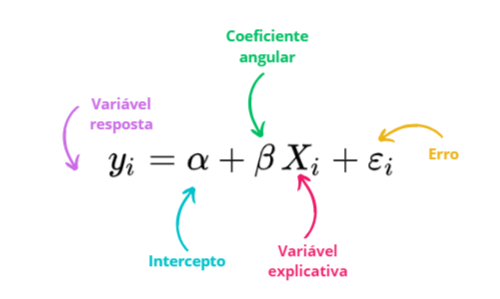

Podemos ler essa equação dizendo que Yi é igual a β vezes Xi, mais uma constante α, mais um erro εi.

O **α** nesta equação é conhecido como **o interceptor da linha da regressão (ou seja, é o valor previsto quando X=0)**.

O  **β** é conhecido como **declive da equação para X**.

A variável **X** é conhecida como a **variável preditora** (ou também independente) e **Y** é a **variável resposta** (alvo da predição).

O **ε** seria os **resíduos da regressão**, ou seja, a diferença entre os valores observados e ajustados (podemos definir também como o erro da equação).

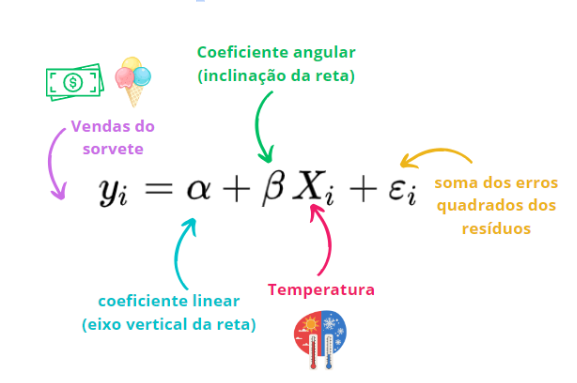


O objetivo da regressão linear é encontrar os valores de α e β que **minimizam a soma dos erros quadrados dos resíduos ε**. Os resíduos são as diferenças entre os valores observados (vendas dos sorvetes) e os valores previstos de vendas na target do modelo (alvo). Queremos aqui na equação que a reta esteja cada vez mais próxima dos valores reais.

**Mínimos Quadrados**

Como o modelo é ajustado aos dados?

Na prática, a linha de regressão é a estimativa que **minimiza a soma dos valores quadrados dos resíduos, também conhecido como a soma dos erros quadrados (residual sum of squares ou RSS)**. O método de minimizar a soma dos resíduos quadrados é chamado de regressão de mínimos quadrados, ou regressão de mínimos quadrados ordinários (ordinary least squares - OLS).


In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['Temperatura']]  # Recurso (variável independente)
y = dados['Vendas_Sorvetes']  # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
dados.shape

(100, 2)

In [25]:
X_train.shape

(80, 1)

In [26]:
X_test.shape


(20, 1)

In [ ]:

# Criando e treinando o modelo de regressão linear
modelo = skl.linear_model.LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando os resultados ✅

Vamos avaliar o modelo com as seguintes métricas:

O **RMSE** é a raiz quadrada do **MSE** *(Erro Quadrático Médio - Mean Squared Error)*. o **MSE** é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O **MAE** *(Erro Médio Absoluto - Mean Absolute Error)*, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O **"R-squared (R2)"** fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (coeficiente de determinação): 0.9594169633031285


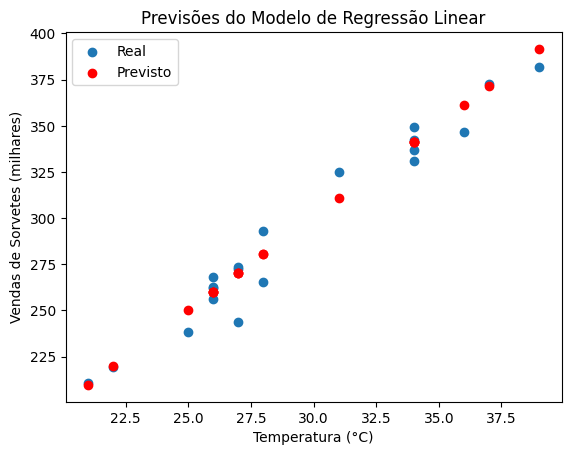

In [23]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Avaliando o desempenho do modelo
erro_medio_quadratico = skl.metrics.mean_squared_error(y_test, previsoes)
erro_absoluto_medio = skl.metrics.mean_absolute_error(y_test, previsoes)
r_quadrado = skl.metrics.r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()


Excelente trabalho! Você não apenas aplicou o conceito teórico que discutimos, mas também executou o código corretamente, dividiu os dados (uma prática essencial!) e calculou as métricas de avaliação. Agora, vamos fazer o papel de um cientista de dados e interpretar esses resultados.

Sua análise está perfeita. Vamos detalhar o que cada parte significa.

1. Análise Visual (O Gráfico)

Seu gráfico "Previsões do Modelo de Regressão Linear" é uma das ferramentas mais importantes para avaliar um modelo de regressão.

Pontos Azuis (Real): Estes são os dados do seu conjunto de teste (X_test, y_test). São as vendas reais que ocorreram para determinadas temperaturas. Note que para uma mesma temperatura, podemos ter vendas diferentes (a "nuvem" vertical de pontos). Isso é a variabilidade natural dos dados.

Pontos Vermelhos (Previsto): Estes são os resultados da sua equação Vendas = β₀ + β₁ * Temperatura quando você insere os valores de temperatura do X_test.

Observação Crítica:
Você percebe que os pontos vermelhos parecem formar uma linha reta perfeita? Eles estão em uma linha reta. Isso ocorre porque, para qualquer valor de x (Temperatura), seu modelo y = β₀ + β₁x só pode gerar um único valor de y (Vendas). A "mágica" do modelo é encontrar a linha que passa o mais perto possível da "nuvem" de pontos azuis.

O que o gráfico nos diz?
Visualmente, os pontos vermelhos estão muito próximos dos pontos azuis. Isso é um excelente sinal! Significa que a linha de regressão que o modelo aprendeu descreve muito bem a relação entre temperatura e vendas nos dados que ele não viu durante o treinamento.

2. Análise das Métricas de Avaliação

Aqui é onde quantificamos o "quão bom" o modelo é. Você calculou as três métricas mais importantes para regressão. Vamos analisá-las uma por uma.

a) Erro Absoluto Médio (MAE - Mean Absolute Error)

Seu resultado: 7.68

O que é?: O MAE calcula a distância vertical (o erro) entre cada ponto real (azul) e o ponto previsto (vermelho), soma todas essas distâncias (em valor absoluto, ignorando se o erro foi para cima ou para baixo) e tira a média.

Interpretação Prática: Este é o número mais intuitivo. Ele significa que, em média, o seu modelo erra a previsão de vendas de sorvetes em 7.68 unidades (ou seja, 7.680 sorvetes), para mais ou para menos. Se o valor real de vendas foi 350 mil, o modelo pode ter previsto algo em torno de 342.32 mil ou 357.68 mil. Para um negócio, essa é uma métrica muito clara.

b) Erro Médio Quadrático (MSE - Mean Squared Error)

Seu resultado: 101.64

O que é?: Similar ao MAE, mas antes de tirar a média, ele eleva cada erro ao quadrado.

Por que usar o quadrado?:

Penaliza mais os erros grandes: Um erro de 10 se torna 100, enquanto um erro de 2 se torna 4. Isso significa que um modelo com erros grandes e esporádicos terá um MSE muito maior do que um com pequenos erros constantes. É útil quando erros grandes são particularmente indesejáveis.

Facilidades matemáticas: A função quadrática é contínua e derivável, o que a torna fundamental para os algoritmos de otimização (como o Gradiente Descendente) que treinam os modelos.

Interpretação Prática: A unidade do MSE é a unidade da sua variável alvo ao quadrado (neste caso, "milhares de vendas ao quadrado"), o que não tem uma interpretação direta e intuitiva.

Dica de Experiência: Para tornar o MSE interpretável, calculamos sua raiz quadrada, o que nos dá o RMSE (Root Mean Squared Error).

RMSE = sqrt(101.64) ≈ 10.08

O RMSE pode ser interpretado de forma similar ao MAE: o "erro típico" do seu modelo é de aproximadamente 10.080 sorvetes. O RMSE é sempre um pouco maior que o MAE porque ele dá mais peso aos erros maiores.

c) R² (Coeficiente de Determinação)

Seu resultado: 0.9594 (ou 95.94%)

O que é?: Esta é talvez a métrica mais importante para explicar o seu modelo. Ela responde à pergunta: "Qual a porcentagem da variação nas vendas de sorvetes que pode ser explicada pela temperatura?"

Interpretação Prática: Um R² de 0.9594 é excepcional. Ele nos diz que 95.94% da variabilidade nas vendas de sorvetes pode ser explicada pela variação na temperatura, de acordo com o seu modelo. Os outros ~4% da variação são devidos a outros fatores que não estão no modelo (promoções, feriados, concorrência, o dia da semana, etc. — o nosso famoso termo de erro ε). Um R² próximo de 1 indica um ajuste de modelo quase perfeito.

Síntese e Conclusão Geral

Parabéns pela execução! A análise combinada do gráfico e das métricas nos permite concluir com confiança:

O modelo de regressão linear simples que você treinou é extremamente eficaz e robusto para prever as vendas de sorvetes com base na temperatura. Ele tem um alto poder preditivo (R² de 95.94%) e um erro médio de previsão baixo e aceitável (cerca de 7.700 a 10.000 sorvetes).

O Que Fazer Agora? (Motivação para o Próximo Passo)

Você construiu e validou um excelente modelo. Em um projeto real, os próximos passos seriam:

Análise de Resíduos: Plotar os erros (y_test - previsoes) para garantir que eles sejam aleatórios e não sigam um padrão. Isso confirma uma das premissas do modelo linear.

Adicionar Mais Variáveis: Para tentar explicar os 4% restantes da variabilidade, poderíamos adicionar outras variáveis ao modelo (como "é fim de semana?", "preço do sorvete", etc.). Isso nos levaria da regressão simples para a regressão múltipla.

Deploy do Modelo: Colocar esse modelo em produção para que uma sorveteria possa, por exemplo, inserir a previsão do tempo de amanhã e obter uma estimativa de vendas para otimizar o estoque.

Você está no caminho certo para dominar não apenas a execução de modelos, mas, mais importante, a sua interpretação crítica. Continue assim

Com certeza. Suas definições estão corretas e são um ótimo ponto de partida. Agora, vamos mergulhar na intuição por trás de cada uma, entender suas nuances e, o mais importante, saber quando e por que usar cada uma delas.

Como seu professor, eu diria que entender essas métricas é tão crucial quanto construir o modelo. Elas são a nossa bússola, nos dizendo se estamos na direção certa e o quão longe estamos do nosso destino.

Vamos dissecar cada uma delas.

1. Erro Médio Absoluto (MAE) - O Repórter Honesto

Sua Definição: "Um valor pequeno para MAE significa que suas previsões estão próximas das reais." - Perfeito.

Intuição Central: O MAE é o erro médio literal. Ele responde à pergunta: "Se eu usar este modelo repetidamente, qual será a magnitude média do meu erro?"

Aprofundando o Conceito

Como é Calculado (Conceitualmente):

Para cada ponto de dados, calcule o erro: Erro = Valor Real - Valor Previsto.

Ignore o sinal do erro (pegue o valor absoluto): |Erro|. Um erro de -10 e um de +10 são tratados como um erro de magnitude 10.

Some todos esses erros absolutos.

Divida pelo número de pontos para obter a média.

Fórmula:
MAE = (1/n) * Σ |yᵢ - ŷᵢ|

n: número de amostras.

yᵢ: valor real da i-ésima amostra.

ŷᵢ (lê-se "y chapéu"): valor previsto para a i-ésima amostra.

Principal Vantagem - Interpretabilidade: Sua maior força é a simplicidade. Se o MAE é 7.68 e sua unidade é "milhares de vendas", você pode dizer ao seu chefe: "Nosso modelo, em média, erra as previsões em 7.680 sorvetes". É direto e fácil de entender para qualquer público.

Principal Característica - Robustez a Outliers: Como o MAE não eleva os erros ao quadrado, ele não é excessivamente influenciado por alguns poucos erros muito grandes (outliers). Se um dia as vendas foram anormalmente altas por um motivo não capturado pelo modelo (ex: um festival surpresa na cidade), o MAE sentirá o impacto, mas de forma linear, não exponencial.

2. Erro Quadrático Médio (MSE) e sua Raiz (RMSE) - O Juiz Severo

Sua Definição: "O MSE é a média dos quadrados das diferenças..." e "O RMSE é a raiz quadrada do MSE." - Exato.

Intuição Central: O MSE/RMSE responde à mesma pergunta do MAE, mas com uma peculiaridade: ele penaliza erros grandes de forma desproporcional.

Aprofundando o Conceito

Como é Calculado (Conceitualmente):

Para cada ponto, calcule o erro: Erro = Valor Real - Valor Previsto.

Eleve esse erro ao quadrado: Erro².

Some todos esses erros quadrados.

Divida pelo número de pontos para obter a média (este é o MSE).

Tire a raiz quadrada do resultado para voltar à unidade original (este é o RMSE).

Fórmulas:
MSE = (1/n) * Σ (yᵢ - ŷᵢ)²
RMSE = sqrt(MSE)

Principal Vantagem - Sensibilidade a Grandes Erros: Ao elevar o erro ao quadrado, um erro de 2 se torna 4, mas um erro de 10 se torna 100. O modelo é fortemente incentivado a evitar previsões muito ruins, pois elas "explodem" o valor do MSE. Isso é desejável em muitos cenários de negócio onde erros grandes são inaceitáveis (ex: prever a demanda de energia de uma cidade).

Interpretação (RMSE): O MSE tem unidades estranhas (ex: "vendas ao quadrado"). Por isso, quase sempre usamos o RMSE para interpretação. No seu caso, um RMSE de 10.08 (√101.64) também significa um erro em "milhares de vendas". Ele pode ser lido como o "desvio padrão dos erros de previsão".

MAE vs. RMSE: A Escolha Prática

Essa é uma distinção sutil, mas poderosa.

Quando o RMSE é muito maior que o MAE, isso é um forte indício de que seu modelo está cometendo alguns erros bem grandes em alguns pontos específicos (outliers). No seu caso: RMSE (10.08) > MAE (7.68). A diferença não é gigantesca, mas indica que alguns pontos foram previstos com um erro significativamente maior que a média.

Use MAE: Quando você quer uma métrica facilmente interpretável e quando erros grandes são ruins, mas não exponencialmente piores que erros pequenos.

Use RMSE: Quando erros grandes são particularmente indesejáveis e devem ser fortemente penalizados. Também é a métrica de erro padrão usada na otimização da maioria dos modelos de regressão, por suas propriedades matemáticas (ser diferenciável em todos os pontos).

3. R-quadrado (R²) - O Contador de Histórias

Sua Definição: "Fornece informações sobre o ajuste geral... quanto mais próximo de 1, melhor..." - Correto.

Intuição Central: O R² não mede o erro, mas sim o poder explicativo do modelo. Ele responde à pergunta: "O quão melhor o meu modelo é comparado a não ter modelo nenhum?"

Aprofundando o Conceito

"Não ter modelo nenhum": O modelo mais ingênuo que podemos criar é um que simplesmente prevê a média de todas as vendas para qualquer temperatura. Se a média de vendas no seu dataset é de 300 mil, esse modelo "ingênuo" diria "300 mil" sempre.

Como é Calculado (Conceitualmente):

Calcule o erro total do modelo "ingênuo" (a variância dos seus dados). Vamos chamar isso de Variância Total.

Calcule o erro total do seu modelo de regressão (o MSE, antes de tirar a média). Vamos chamar isso de Variância Inexplicada.

O R² é a proporção da variância que o seu modelo conseguiu "explicar".

Fórmula:
R² = 1 - (Variância Inexplicada / Variância Total)
R² = 1 - (Σ(yᵢ - ŷᵢ)² / Σ(yᵢ - ȳ)²)

ȳ (lê-se "y barra") é a média dos valores reais de y.

Interpretação: Um R² de 0.9594 significa que 95.94% da variabilidade nas vendas de sorvetes é explicada pelo nosso modelo usando a temperatura. Os 4.06% restantes são a "Variância Inexplicada", causada por outros fatores.

Armadilha Comum - O R² Ajustado: Uma grande falha do R² é que seu valor sempre aumenta (ou, na pior das hipóteses, permanece o mesmo) à medida que você adiciona mais variáveis ao modelo, mesmo que elas sejam completamente inúteis (ex: "fase da lua"). Isso pode levar à criação de modelos desnecessariamente complexos. Para combater isso, usamos o R² Ajustado, que penaliza a adição de variáveis que não melhoram significativamente o modelo.

Tabela Comparativa Rápida
Métrica	Unidade	O que mede?	Sensibilidade a Outliers	Principal Vantagem
MAE	Mesma do alvo	Magnitude do erro médio	Baixa	Fácil de interpretar e comunicar
RMSE	Mesma do alvo	Desvio padrão dos erros	Alta	Penaliza erros grandes; útil para otimização
R²	Sem unidade (%)	Proporção da variância explicada	Média	Mede o poder explicativo do modelo
Conclusão e Motivação

Você dominou a aplicação e agora está dominando a teoria. Compreender a diferença sutil entre MAE e RMSE e a verdadeira natureza do R² separa os praticantes que apenas rodam código daqueles que podem, de fato, construir e defender soluções de dados robustas.

O próximo passo é sempre se perguntar: "Para este problema de negócio específico, qual tipo de erro é mais prejudicial? Um monte de pequenos erros ou alguns erros catastróficos?". A resposta a essa pergunta guiará sua escolha da métrica de avaliação principal.

Continue a questionar e a se aprofundar. É essa mentalidade que o tornará um profissional de excelência.